In [ ]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
"""
  ████
██    ██   Datature
  ██  ██   Powering Breakthrough AI
    ██
 
@File    :   active_learning_demo.ipynb
@Author  :   Leonard So
@Version :   1.0
@Contact :   hello@datature.io
@License :   Apache License 2.0
@Desc    :   DeFRCN demo for one-shot learning.
"""

The following code is adapted and heavily reliant on code and demos from https://github.com/er-muyue/DeFRCN . Special thanks to Qiao et. al for their work and the resources used to provide this code.

The following two cells are only applicable if you are testing on Google Colab. Install all the following dependencies below and also git clone or download the DeFRCN repository linked here: https://github.com/er-muyue/DeFRCN/tree/main/defrcn.https://github.com/er-muyue/DeFRCN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall torch torchvision -y

Found existing installation: torch 1.12.0+cu113
Uninstalling torch-1.12.0+cu113:
  Successfully uninstalled torch-1.12.0+cu113
Found existing installation: torchvision 0.13.0+cu113
Uninstalling torchvision-0.13.0+cu113:
  Successfully uninstalled torchvision-0.13.0+cu113


In [ ]:
!pip3 install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0 MB 10 kB/s 
     |████████████████████████████████| 5.9 MB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.6.0+cu101 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.6.0+cu101 which is incompatible.
fastai 2.7.7 requires torch<1.13,>=1.7, but you have torch 1.6.0+cu101 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.7.0+cu101 which is incompatible.


In [ ]:
!python3 -m pip install detectron2==0.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6 MB 546 kB/s 
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 596 kB 10.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=0b58e676310bd8f0cdff1de168c19a2f1c8a93fe9fb4d63053cceb620366a923
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=41fb52052f66ce420f1090028712c87f5cb482e2dc82cb801ca3c19d2ee27d98
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built fvcore iopath
  Attempting uninsta

In [ ]:
%cd drive/MyDrive/DeFRCN

/content/drive/MyDrive/DeFRCN


In [ ]:
!python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here, you can create the config yaml file for novel fine-tuning and testing. If you would like to make changes on the data path, you should go into the config files and dataloader code. The following code was run with such adaptations made for the boat dataset.

In [ ]:
!python3 tools/create_config.py --dataset coco14 --config_root configs/coco --shot 22 --seed 1 --setting 'fsod'

In [ ]:
# training
!python3 main.py --num-gpus 1 --config-file configs/coco/defrcn_fsod_r101_novel_22shot_seed1.yaml  --eval-during-train \
                --opts MODEL.WEIGHTS checkpoints/coco/demo/defrcn_det_r101_base1/model_reset_remove.pth OUTPUT_DIR checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed1  \
                       TEST.PCB_MODELPATH ImageNetPretrained/torchvision/resnet101-5d3b4d8f.pth


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/11 03:59:51 detectron2]: Rank of current process: 0. World size: 1
[08/11 03:59:51 detectron2]: Command line arguments: Namespace(config_file='configs/coco/defrcn_fsod_r101_novel_22shot_seed1.yaml', dist_url='tcp://127.0.0.1:49152', end_iter=-1, eval_all=False, eval_during_train=True, eval_iter=-1, eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'checkpoints/coco/demo/defrcn_det_r101_base1/model_reset_remove.pth', 'OUTPUT_DIR', 'checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed1', 'TEST.PCB_MODELPATH', 'ImageNetPretrained/torchvision/resnet101-5d3b4d8f.pth'], resume=False, sta

The training and inference is performed above, and all results are saved. The following code is for plotting the results of the bounding boxes on images.

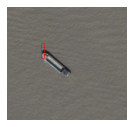

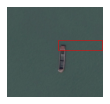

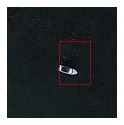

In [ ]:
import torch
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

def vis_image(im, bboxs, im_name):
    dpi = 300
    fig, ax = plt.subplots()
    ax.imshow(im, aspect='equal')
    plt.axis('off')
    height, width, channels = im.shape
    fig.set_size_inches(width/100.0/3.0, height/100.0/3.0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
    plt.margins(0,0)
    # Show box (off by default, box_alpha=0.0)
    for bbox in bboxs:
        box_height = bbox[1] - bbox[3]
        box_width = bbox[0] - bbox[2]
        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[3]),
                          box_width,
                          box_height,
                          fill=False, edgecolor='r',
                          linewidth=0.5, alpha=1))
    output_name = os.path.basename(im_name)
    #plt.savefig(im_name, dpi=dpi, bbox_inches='tight', pad_inches=0)
    #plt.close('all')

preds = torch.load("checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed1/inference/instances_predictions.pth")
image_id_to_file = {0: 'boat253.png', 1: 'boat251.png', 2: 'boat25.png', 3: 'boat250.png'}
for pred in preds[:3]:
    bboxes = [box['bbox'] for box in pred['instances']]
    name = image_id_to_file[pred['image_id']]
    img = mpimg.imread(os.path.join('datasets/boats/Training', name))
    vis_image(img, bboxes, name)

In [ ]:
!python3 main.py --num-gpus 1 --config-file configs/coco/defrcn_fsod_r101_novel_22shot_seed0.yaml --eval-only  \
                --opts MODEL.WEIGHTS checkpoints/coco/demo/defrcn_det_r101_base1/model_reset_remove.pth OUTPUT_DIR checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed0  \
                       TEST.PCB_MODELPATH ImageNetPretrained/torchvision/resnet101-5d3b4d8f.pth


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/09 08:43:26 detectron2]: Rank of current process: 0. World size: 1
[08/09 08:43:26 detectron2]: Command line arguments: Namespace(config_file='configs/coco/defrcn_fsod_r101_novel_22shot_seed0.yaml', dist_url='tcp://127.0.0.1:49152', end_iter=-1, eval_all=False, eval_during_train=False, eval_iter=-1, eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'checkpoints/coco/demo/defrcn_det_r101_base1/model_reset_remove.pth', 'OUTPUT_DIR', 'checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed0', 'TEST.PCB_MODELPATH', 'ImageNetPretrained/torchvision/resnet101-5d3b4d8f.pth'], resume=False, sta

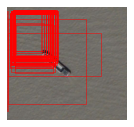

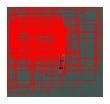

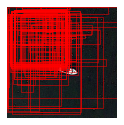

In [ ]:
import torch
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

def vis_image(im, bboxs, im_name):
    dpi = 300
    fig, ax = plt.subplots()
    ax.imshow(im, aspect='equal')
    plt.axis('off')
    height, width, channels = im.shape
    fig.set_size_inches(width/100.0/3.0, height/100.0/3.0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
    plt.margins(0,0)
    # Show box (off by default, box_alpha=0.0)
    for bbox in bboxs:
        ax.add_patch(
            plt.Rectangle((bbox[2], bbox[3]),
                          bbox[0] - bbox[2],
                          bbox[1] - bbox[3],
                          fill=False, edgecolor='r',
                          linewidth=0.5, alpha=1))
    output_name = os.path.basename(im_name)
    #plt.savefig(im_name, dpi=dpi, bbox_inches='tight', pad_inches=0)
    #plt.close('all')

preds = torch.load("checkpoints/coco/demo/defrcn_fsod_r101_novel/fsrw-like/shot22_seed0/inference/instances_predictions.pth")
image_id_to_file = {0: 'boat253.png', 1: 'boat251.png', 2: 'boat25.png'}#, 3: 'boat250.png'}
for pred in preds[:3]:
    bboxes = [box['bbox'] for box in pred['instances']]
    name = image_id_to_file[pred['image_id']]
    img = mpimg.imread(os.path.join('datasets/boats/Training', name))
    vis_image(img, bboxes, name)